The first thing to do is to import all neccessary packages and libaries needed to analyse, visualise and model the datasets.

Then, we would clean each dataset  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Then we read our data to our notebook using pandas, make sure that your data and notebook is in the same folder

In [2]:
train_pref = pd.read_csv('trainperf.csv')
train_prev = pd.read_csv('trainprevloans.csv')

test_pref = pd.read_csv('testperf.csv')
test_prev = pd.read_csv('testprevloans.csv')
sample_sub = pd.read_csv('SampleSubmissionnew.csv')


You can check the columns in your dataset use '.columns' as used below

Use '.head' to print the first few rows of your dataset

In [3]:
train_pref.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


Use '.drop' to drop column(s) in your dataset

Also 'isnull().sum()' sums all the rows with null values in each columns

In [4]:
train_pref = train_pref.drop('referredby', axis=1)
train_pref.isnull().sum()


customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
good_bad_flag    0
dtype: int64

use '.astype('data_type') to change the data type of your dataset. Here, am changing the datatype of each columns. In converting to datetime, an alternative is to use 'pd.to_datetime(dataset.column_name)'

Use '.dtypes' to check the data type

In [5]:
#pref clean
train_pref.customerid = train_pref.customerid.astype('category')
train_pref.good_bad_flag = train_pref.good_bad_flag.astype('category')
train_pref.approveddate = pd.to_datetime(train_pref.approveddate)
train_pref.creationdate = pd.to_datetime(train_pref.creationdate)

train_pref.dtypes

customerid             category
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int64
good_bad_flag          category
dtype: object

Now we need to change our datetime columns to timestamps each. Because timestamp is the pandas equivalent of python's datetime

In [6]:
#timestamp pref
import datetime
from datetime import datetime
train_pref2= train_pref.copy()
birthdate2 = [datetime.timestamp(i) for i in train_pref.approveddate]
train_pref = train_pref.drop('approveddate', axis=1)
train_pref['approveddate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in train_pref.creationdate]
train_pref = train_pref.drop('creationdate', axis=1)
train_pref['creationdate'] = birthdate2


Then we do the same for train_prev as described above

In [7]:
train_prev.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [8]:
train_prev.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [9]:
train_prev.dtypes

customerid          object
systemloanid         int64
loannumber           int64
approveddate        object
creationdate        object
loanamount         float64
totaldue           float64
termdays             int64
closeddate          object
referredby          object
firstduedate        object
firstrepaiddate     object
dtype: object

In [10]:
train_prev2 = train_prev.drop('referredby', axis=1)
    
def prev_clean(df):
    df.customerid = df.customerid.astype('category')
    df.approveddate = df.approveddate.astype('datetime64')
    df.creationdate = df.creationdate.astype('datetime64')
    df.closeddate = df.closeddate.astype('datetime64')
    df.firstduedate= df.firstduedate.astype('datetime64')
    df.firstrepaiddate= df.firstrepaiddate.astype('datetime64')
    print(df.dtypes)
prev_clean(train_prev2)
    


customerid               category
systemloanid                int64
loannumber                  int64
approveddate       datetime64[ns]
creationdate       datetime64[ns]
loanamount                float64
totaldue                  float64
termdays                    int64
closeddate         datetime64[ns]
firstduedate       datetime64[ns]
firstrepaiddate    datetime64[ns]
dtype: object


In [11]:
#prev3 timestamp
train_prev3= train_prev2.copy()

birthdate2 = [datetime.timestamp(i) for i in train_prev2.approveddate]
train_prev2 = train_prev2.drop('approveddate', axis=1)
train_prev2['approveddate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in train_prev2.creationdate]
train_prev2 = train_prev2.drop('creationdate', axis=1)
train_prev2['creationdate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in train_prev2.closeddate]
train_prev2 = train_prev2.drop('closeddate', axis=1)
train_prev2['closeddate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in train_prev2.firstduedate]
train_prev2 = train_prev2.drop('firstduedate', axis=1)
train_prev2['firstduedate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in train_prev2.firstrepaiddate]
train_prev2 = train_prev2.drop('firstrepaiddate', axis=1)
train_prev2['firstrepaiddate'] = birthdate2


Then we merge both dataset

In [12]:
on_list =['approveddate',
          'systemloanid','loanamount',
          'loannumber','totaldue','termdays',
          'creationdate',]
train_prev3= train_prev2.drop(on_list, axis=1)
train = train_pref.merge(train_prev3,
                         how='inner',
                         right_on='customerid',
                         left_on='customerid',)
train.head()


,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,approveddate,creationdate,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,1.500967e+09,1.500964e+09,1.472742e+09,1.473808e+09,1.472742e+09
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,1.500967e+09,1.500964e+09,1.495979e+09,1.496099e+09,1.495753e+09
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,1.500967e+09,1.500964e+09,1.493242e+09,1.491260e+09,1.493241e+09
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,1.500967e+09,1.500964e+09,1.498401e+09,1.499036e+09,1.498400e+09
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,1.500967e+09,1.500964e+09,1.500967e+09,1.501456e+09,1.500966e+09


In [13]:
#Labeling the target variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['good_bad_flag'] = le.fit_transform(train['good_bad_flag'])


Get the mean of customerid with groupbyb to ensurethat their is only one type of customerid

In [14]:
train= train.groupby(['customerid']).mean().reset_index()


Now, let's do a few visualisation before scaling our data.

we'll be ploting with seanborn (sns), matplotlib.pyplot (plt), ploty.express (px) and pandas 

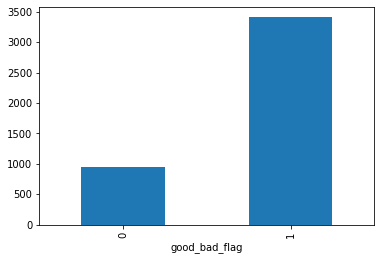

In [15]:
#ploting with pandas
grouped = train.groupby(['good_bad_flag']).totaldue.count()
grouped.plot.bar(x= 'good_bad_flag')


In the bar above, we can see that there's more good than bad flag

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x73371d5710>,
      dtype=object)

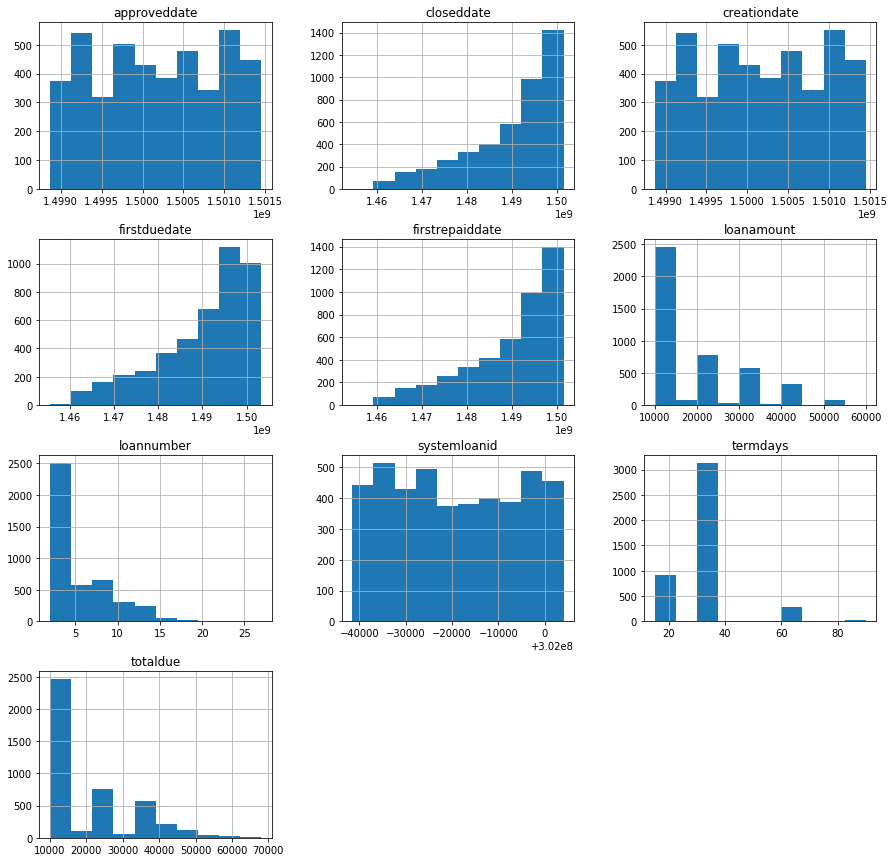

In [21]:
#ploting the historage of each columns 
#with matplotlib.pyplot
train.hist(figsize=(15, 15))


Now, i'll be using seaborn yo make visualisations. i'll be using facet grid to show each variable relationship

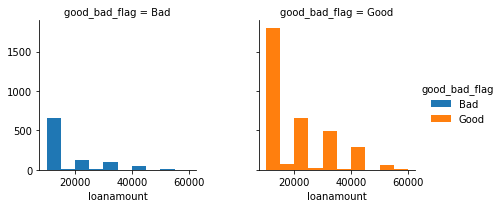

In [22]:

a= sns.FacetGrid(train, col= 'good_bad_flag', hue='good_bad_flag')
a=(a.map(plt.hist, 'loanamount').add_legend())
plt.subplots_adjust(hspace=0.4, wspace=0.4)
#a.set_axis_labels(list)
#bank_account_type


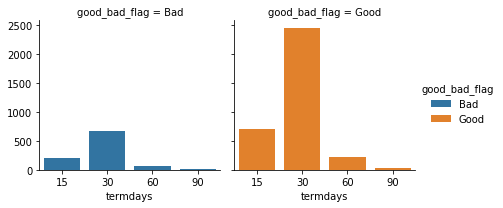

In [23]:
a= sns.FacetGrid(train, col= 'good_bad_flag', hue='good_bad_flag')
a=(a.map(sns.countplot, 'termdays').add_legend())



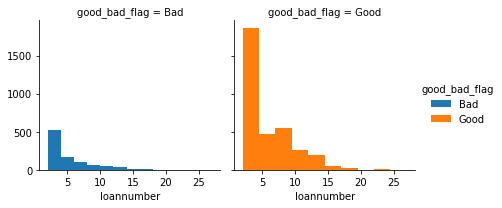

In [24]:
a= sns.FacetGrid(train, col= 'good_bad_flag', hue='good_bad_flag')
a=(a.map(plt.hist, 'loannumber').add_legend())


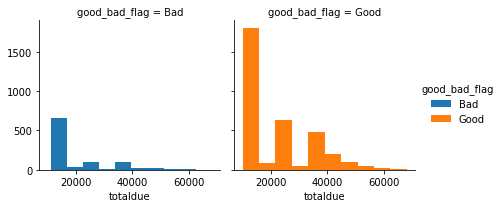

In [25]:
a= sns.FacetGrid(train, col= 'good_bad_flag', hue='good_bad_flag')
a=(a.map(plt.hist,'totaldue').add_legend())


Now i'll be making visualisations with plotly.express

In [21]:
#group2= train.groupby(['good_bad_flag', 'loanamount'])
import plotly.express as px
figpx.area(train, x='totaldue', y='termdays',
      width=500,color='good_bad_flag',)



In [22]:

fig = px.area(train, x='totaldue', y = 'loanamount',
                color='good_bad_flag', hover_name='good_bad_flag',
                log_x= False, width= 500,)
fig

In [23]:
train.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,approveddate,creationdate,closeddate,firstduedate,firstrepaiddate
0,8a1088a0484472eb01484669e3ce4e0b,301999397,2,10000.0,11500.0,15,0,1.501181e+09,1.501177e+09,1.500926e+09,1.500332e+09,1.500925e+09
1,8a1a1e7e4f707f8b014f797718316cad,301997672,5,30000.0,39000.0,60,1,1.501096e+09,1.501092e+09,1.483427e+09,1.483247e+09,1.483280e+09
2,8a1a32fc49b632520149c3b8fdf85139,301976551,8,20000.0,24500.0,30,1,1.499970e+09,1.499967e+09,1.489513e+09,1.489495e+09,1.489506e+09
3,8a1eb5ba49a682300149c3c068b806c7,301975382,9,30000.0,39000.0,60,1,1.499902e+09,1.499899e+09,1.489269e+09,1.489360e+09,1.489142e+09
4,8a1edbf14734127f0147356fdb1b1eb2,301979352,3,10000.0,11500.0,15,1,1.500131e+09,1.500127e+09,1.497438e+09,1.497740e+09,1.497438e+09


In [24]:
#scaling necessary variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
cols=['loannumber', 'loanamount', 'totaldue', 'termdays']
train[cols] = scale.fit_transform(train[cols])
target = train['good_bad_flag']
train =train.drop('good_bad_flag', axis=1)
target.to_csv('train_target.csv')
train.to_csv('train_scaled.csv')

train_new = train.drop('customerid', axis=1)

train.head()



,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,approveddate,creationdate,closeddate,firstduedate,firstrepaiddate
0,8a1088a0484472eb01484669e3ce4e0b,301999397,-0.869460,-0.727166,-0.817744,-1.238981,1.501181e+09,1.501177e+09,1.500926e+09,1.500332e+09,1.500925e+09
1,8a1a1e7e4f707f8b014f797718316cad,301997672,-0.048586,1.132723,1.484314,2.670805,1.501096e+09,1.501092e+09,1.483427e+09,1.483247e+09,1.483280e+09
2,8a1a32fc49b632520149c3b8fdf85139,301976551,0.772288,0.202779,0.270502,0.064281,1.499970e+09,1.499967e+09,1.489513e+09,1.489495e+09,1.489506e+09
3,8a1eb5ba49a682300149c3c068b806c7,301975382,1.045913,1.132723,1.484314,2.670805,1.499902e+09,1.499899e+09,1.489269e+09,1.489360e+09,1.489142e+09
4,8a1edbf14734127f0147356fdb1b1eb2,301979352,-0.595835,-0.727166,-0.817744,-1.238981,1.500131e+09,1.500127e+09,1.497438e+09,1.497740e+09,1.497438e+09



Now, i'll move to the test dataset

I'll be using creationdate column and approveddate column in test_prev instead


In [25]:
test_pref = pd.read_csv('testperf.csv')
test_prev = pd.read_csv('testprevloans.csv')

test_pref =  test_pref.drop('creationdate', axis=1)
test_pref =  test_pref.drop('approveddate', axis=1)
test_pref = test_pref.drop('referredby', axis=1)
test_pref.customerid = test_pref.customerid.astype('category')

test_prev = test_prev.drop('referredby', axis=1)
test_prev.customerid = train_pref.customerid.astype('category')
test_prev.approveddate = test_prev.approveddate.astype('datetime64')
test_prev.creationdate = test_prev.creationdate.astype('datetime64')
test_prev.closeddate = pd.to_datetime(test_prev.closeddate)
test_prev.firstduedate= pd.to_datetime(test_prev.firstduedate)
test_prev.firstrepaiddate= pd.to_datetime(test_prev.firstrepaiddate)



In [26]:
#all datetime

birthdate2 = [datetime.timestamp(i) for i in test_prev.approveddate]
test_prev = test_prev.drop('approveddate', axis=1)
test_prev['approveddate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in test_prev.creationdate]
test_prev = test_prev.drop('creationdate', axis=1)
test_prev['creationdate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in test_prev.closeddate]
test_prev = test_prev.drop('closeddate', axis=1)
test_prev['closeddate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in test_prev.firstduedate]
test_prev = test_prev.drop('firstduedate', axis=1)
test_prev['firstduedate'] = birthdate2

birthdate2 = [datetime.timestamp(i) for i in test_prev.firstrepaiddate]
test_prev = test_prev.drop('firstrepaiddate', axis=1)
test_prev['firstrepaiddate'] = birthdate2




In [27]:
#merging

on_list =['customerid','systemloanid',
          'loannumber','totaldue','termdays',]
test_prev2= test_prev.drop(on_list, axis=1)
test = test_pref.merge(test_prev2,how='inner',
                         right_on='loanamount',
                         left_on='loanamount',)

test = test.groupby(['customerid']).mean().reset_index()
test.head()


,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,approveddate,creationdate,closeddate,firstduedate,firstrepaiddate
0,8a28afc7474813a40147639ec637156b,301997111.0,11.0,25000.0,27500.0,30.0,1.488983e+09,1.488979e+09,1.491193e+09,1.491515e+09,1.491192e+09
1,8a3735d5518aba7301518ac34413010d,301968180.0,7.0,20000.0,24500.0,30.0,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09
2,8a76e7d443e6e97c0143ed099d102b1d,302000599.0,6.0,20000.0,24500.0,30.0,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09
3,8a818823525dceef01525deda2480384,301961219.0,10.0,40000.0,48000.0,60.0,1.493265e+09,1.493261e+09,1.495889e+09,1.495859e+09,1.495605e+09
4,8a818926522ea5ef01523aff15c37482,301982498.0,3.0,20000.0,24500.0,30.0,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09


In [28]:
test.dtypes

customerid         category
systemloanid        float64
loannumber          float64
loanamount          float64
totaldue            float64
termdays            float64
approveddate        float64
creationdate        float64
closeddate          float64
firstduedate        float64
firstrepaiddate     float64
dtype: object

In [29]:
#filling null values
test = test.fillna(test.mean())
test.isnull().sum()


customerid         0
systemloanid       0
loannumber         0
loanamount         0
totaldue           0
termdays           0
approveddate       0
creationdate       0
closeddate         0
firstduedate       0
firstrepaiddate    0
dtype: int64

In [30]:

#scaling necessary variables

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
cols=['loannumber', 'loanamount', 'totaldue', 'termdays']
test[cols] = test[cols].astype('int')
test[cols] = scale.fit_transform(test[cols])


In [31]:
test.to_csv('test_scaled.csv')
test_cat= test.customerid
test_cat.to_csv('test_customerid.csv')
test_new = test.drop('customerid', axis=1)
test.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,approveddate,creationdate,closeddate,firstduedate,firstrepaiddate
0,8a28afc7474813a40147639ec637156b,301997111.0,1.619273,0.713858,0.567725,0.107582,1.488983e+09,1.488979e+09,1.491193e+09,1.491515e+09,1.491192e+09
1,8a3735d5518aba7301518ac34413010d,301968180.0,0.524787,0.240241,0.311360,0.107582,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09
2,8a76e7d443e6e97c0143ed099d102b1d,302000599.0,0.251166,0.240241,0.311360,0.107582,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09
3,8a818823525dceef01525deda2480384,301961219.0,1.345652,2.134710,2.319556,2.817365,1.493265e+09,1.493261e+09,1.495889e+09,1.495859e+09,1.495605e+09
4,8a818926522ea5ef01523aff15c37482,301982498.0,-0.569699,0.240241,0.311360,0.107582,1.488272e+09,1.488268e+09,1.490317e+09,1.490482e+09,1.490311e+09



Now, it's time to model the dataset
I'll be using different classification algorithms; Gradient Boosting Classifier, KNeighbors Classifier and Decision Tree Classifier


In [32]:
#split and model train
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_new, target, train_size = 0.8, random_state= 42)

gbr= GradientBoostingClassifier()
gbr.fit(x_train, y_train)

print(1- (accuracy_score(y_train, gbr.predict(x_train))))
print(1- (accuracy_score(y_test, gbr.predict(x_test))))



0.19242902208201895
0.20871559633027525


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
print(1- (accuracy_score(y_train, knc.predict(x_train))))
print(1- (accuracy_score(y_test, knc.predict(x_test))))


0.18325207915113273
0.22133027522935778


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(1- (accuracy_score(y_train, dtc.predict(x_train))))
print(1- (accuracy_score(y_test, dtc.predict(x_test))))



0.0
0.29587155963302747


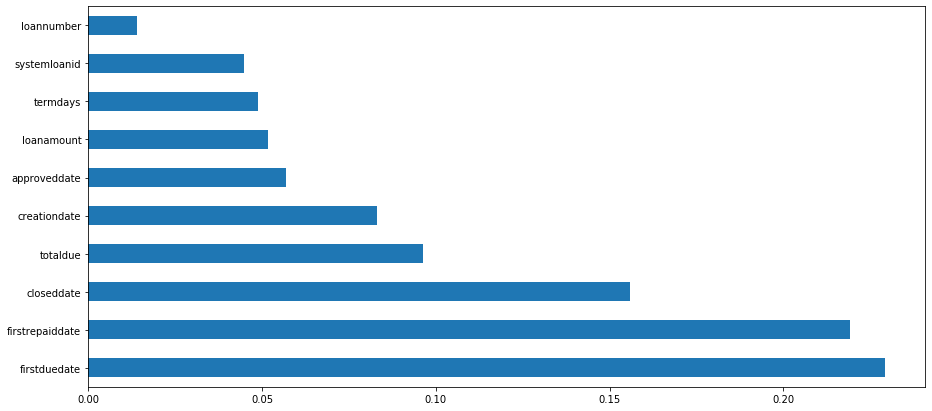

In [35]:
#feature importance for gradient boosting
#classifier
%matplotlib inline 
plt.figure(figsize=(15,7))
feat_importances = pd.Series(gbr.feature_importances_, index = train_new.columns)
feat_importances.nlargest(10).plot(kind='barh')


Predicting with the test dataset

In [36]:
test_pred = gbr.predict(test_new)

test_cat = pd.DataFrame(test_cat)
test_cat['God_Bad_flag'] = test_pred
test_cat.to_csv('sub_cat2.csv', index= False)


In [37]:
test_cat.head()

,customerid,God_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
